<a href="https://colab.research.google.com/github/aisyahdnn/Skripsi/blob/master/Data8020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
import math
import os
import matplotlib.pyplot as plt
import cv2

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from skimage import io
from skimage import feature

In [5]:
terinfeksi_data = os.listdir('/content/drive/My Drive/Dataset/DATA8020/Terinfeksi')
print(len(terinfeksi_data))
print(terinfeksi_data)

print('\n')

tidakTerinfeksi_data = os.listdir('/content/drive/My Drive/Dataset/DATA8020/TidakTerinfeksi')
print(len(tidakTerinfeksi_data))
print(tidakTerinfeksi_data)

800
['C33P1thinF_IMG_20150619_114756a_cell_180.png', 'C33P1thinF_IMG_20150619_114756a_cell_182.png', 'C33P1thinF_IMG_20150619_114756a_cell_181.png', 'C33P1thinF_IMG_20150619_114756a_cell_179.png', 'C33P1thinF_IMG_20150619_115740a_cell_162.png', 'C33P1thinF_IMG_20150619_115740a_cell_163.png', 'C33P1thinF_IMG_20150619_115740a_cell_161.png', 'C33P1thinF_IMG_20150619_115808a_cell_205.png', 'C33P1thinF_IMG_20150619_115808a_cell_206.png', 'C33P1thinF_IMG_20150619_120645a_cell_216.png', 'C33P1thinF_IMG_20150619_120645a_cell_215.png', 'C33P1thinF_IMG_20150619_120645a_cell_217.png', 'C33P1thinF_IMG_20150619_120742a_cell_210.png', 'C33P1thinF_IMG_20150619_120804a_cell_224.png', 'C33P1thinF_IMG_20150619_120838a_cell_222.png', 'C33P1thinF_IMG_20150619_121102a_cell_193.png', 'C33P1thinF_IMG_20150619_121229a_cell_178.png', 'C33P1thinF_IMG_20150619_121229a_cell_179.png', 'C33P1thinF_IMG_20150619_121229a_cell_177.png', 'C33P1thinF_IMG_20150619_121300a_cell_156.png', 'C33P1thinF_IMG_20150619_121411a_ce

In [0]:
#SEGMENTASI CANNY DAN EKSTRAKSI HUMOMENT

x = np.array([['H1','H2','H3','H4','H5','H6','H7','Actual']])

#Proses Citra Malaria Terinfeksi
for i in range(len(terinfeksi_data)):
    img = cv2.imread('/content/drive/My Drive/Dataset/DATA8020/Terinfeksi' + "/" + terinfeksi_data[i])
    edges = cv2.Canny(img,80,30)
    a = cv2.HuMoments(cv2.moments(edges)).flatten()
    a = np.append(a,1)
    x = np.vstack((x,a))

#Proses Citra Malaria TidakTerinfeksi
for i in range(len(tidakTerinfeksi_data)):
    img = cv2.imread('/content/drive/My Drive/Dataset/DATA8020/TidakTerinfeksi' + "/" + tidakTerinfeksi_data[i])
    edges = cv2.Canny(img,80,30)
    a = cv2.HuMoments(cv2.moments(edges)).flatten()
    a = np.append(a,0)
    x = np.vstack((x,a))

In [0]:
#EXPORT to CSV
np.savetxt("/content/drive/My Drive/Dataset/DataBaru8020.csv", x, fmt='%s',delimiter=',' )

In [8]:
#LOAD CSV DATASET

dataset = pd.read_csv('/content/drive/My Drive/Dataset/DataBaru8020.csv')
print (len(dataset))
print (dataset)

1000
           H1            H2            H3  ...            H6            H7  Actual
0    0.023085  3.748378e-05  1.083478e-07  ...  1.259026e-10 -8.148153e-16     1.0
1    0.016134  5.471398e-06  4.302842e-07  ... -1.335775e-10 -1.873219e-13     1.0
2    0.018783  2.231958e-06  5.393779e-08  ...  3.336873e-10  1.835801e-14     1.0
3    0.013520  4.105438e-07  5.353142e-08  ...  2.694405e-10  6.253417e-14     1.0
4    0.016214  1.284929e-07  5.431984e-08  ... -4.670742e-11  2.687915e-14     1.0
..        ...           ...           ...  ...           ...           ...     ...
995  0.045219  2.137164e-05  4.845882e-08  ... -5.404949e-10  8.723522e-15     0.0
996  0.040006  3.158007e-07  3.813799e-06  ... -4.194548e-11 -3.941942e-14     0.0
997  0.041283  1.063268e-05  9.545901e-08  ...  2.082204e-11  1.452567e-14     0.0
998  0.034514  7.839604e-05  1.202540e-06  ...  8.300950e-09 -8.378332e-13     0.0
999  0.042434  1.752171e-05  2.350503e-08  ...  1.338997e-10  3.881085e-18     0.0

In [9]:
#split data (membagi data)
x = dataset.iloc[:, 0:7] #mulai dr colmn index ke0, sbnyk 7 colmn msuk ke var (X)
y = dataset.iloc[:, 7] #hny colmn  index ke7 yg msuk ke var (Y)


#split train n test dataset
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=2, test_size=0.1)

print(len(y_test))
print(len(x_train))
print(len(dataset))
x

100
900
1000


,H1,H2,H3,H4,H5,H6,H7
0,0.023085,3.748378e-05,1.083478e-07,2.212270e-08,-7.135643e-16,1.259026e-10,-8.148153e-16
1,0.016134,5.471398e-06,4.302842e-07,4.716702e-07,1.003089e-13,-1.335775e-10,-1.873219e-13
2,0.018783,2.231958e-06,5.393779e-08,3.262890e-07,-3.920058e-14,3.336873e-10,1.835801e-14
3,0.013520,4.105438e-07,5.353142e-08,4.211064e-07,-9.324107e-15,2.694405e-10,6.253417e-14
4,0.016214,1.284929e-07,5.431984e-08,2.390624e-07,-4.434190e-15,-4.670742e-11,2.687915e-14
...,...,...,...,...,...,...,...
995,0.045219,2.137164e-05,4.845882e-08,1.169888e-07,-1.220704e-15,-5.404949e-10,8.723522e-15
996,0.040006,3.158007e-07,3.813799e-06,8.845486e-08,3.294870e-14,-4.194548e-11,-3.941942e-14
997,0.041283,1.063268e-05,9.545901e-08,1.683334e-07,1.563128e-14,2.082204e-11,1.452567e-14
998,0.034514,7.839604e-05,1.202540e-06,1.039504e-06,-8.054772e-13,8.300950e-09,-8.378332e-13


1.0    722
0.0    178
Name: Actual, dtype: int64
1.0    78
0.0    22
Name: Actual, dtype: int64


Text(0.5, 1.0, 'TESTING')

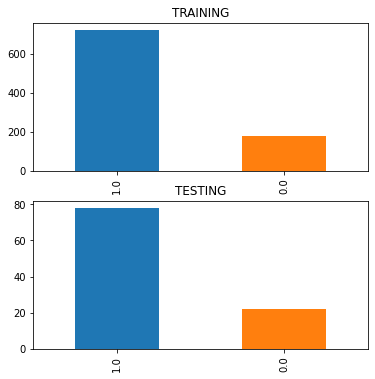

In [10]:
print(y_train.value_counts()) #mnmpilkn jum.data y_train brdsrkn value

print(y_test.value_counts())  #mnmpilkn jum.data y_test brdsrkn value


plt.figure(figsize=(6,6)) #mngtur ukuran skla grafik

#mnmpilkn visualisasi grafik
plt.subplot(2,1,1);y_train.value_counts().plot(kind='bar', color=['C0','C1','C2','C3','C4','C5','C6']);plt.title('TRAINING')
plt.subplot(2,1,2);y_test.value_counts().plot(kind='bar', color=['C0','C1','C2','C3','C4','C5','C6']);plt.title('TESTING')

In [11]:
#scaling data
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)

x_test = sc_x.transform(x_test)
x_train

array([[-1.30260375e+00, -5.96840313e-01, -5.06398667e-01, ...,
         7.00248935e-02, -3.47787444e-01,  2.79836150e-03],
       [-3.89721181e-01, -8.68218148e-02,  1.43676344e+00, ...,
         2.09185946e-01, -1.30025054e-01, -2.15421575e-01],
       [ 1.67536568e-01, -3.88123115e-01, -4.70953653e-01, ...,
         7.01789963e-02, -3.57009145e-01,  2.19751245e-03],
       ...,
       [ 8.16496604e-01,  1.04849692e+00,  2.65708881e+00, ...,
        -9.70215878e-01, -4.72401352e-03,  2.14970568e+00],
       [-1.20590621e+00, -6.07519081e-01, -4.69584931e-01, ...,
         6.47841732e-02, -3.46607914e-01, -2.38280069e-03],
       [-1.56968333e+00, -5.66697342e-01, -5.03246634e-01, ...,
         6.93964279e-02, -3.43250852e-01,  3.89735272e-03]])

In [0]:
#u/ perulangan menampilkan semua nilai K

for x in range(2,900):   
    #choose method and fitting
    classifier = KNeighborsClassifier(n_neighbors=x,p=2,metric='euclidean')
    classifier.fit(x_train, y_train)

    #testing data
    y_pred = classifier.predict(x_test)

    #print result
    cm = confusion_matrix(y_test, y_pred)
    print("k = " , x)
    print (cm)
    print("Akurasi :" , accuracy_score(y_test, y_pred))
    print("presisi :" , precision_score(y_test, y_pred,average=None))
    print("recall :" , recall_score(y_test, y_pred,average=None))
    print("F-Score :" , f1_score(y_test, y_pred,average=None))
    print("--------------------------------------------")

In [19]:
#u/ perulangan lgsng mencari nilai K yang mempunyai akurasi tertinggi

akurasi = 0
for x in range(2,10): 
    #choose method and fitting
    classifier = KNeighborsClassifier(n_neighbors=x,p=2,metric='euclidean')
    classifier.fit(x_train, y_train)

    #testing data
    y_pred = classifier.predict(x_test)

    #print result
    cm = confusion_matrix(y_test, y_pred)
    tertinggi = accuracy_score(y_test, y_pred)
    if tertinggi >= akurasi:
        akurasi = tertinggi
        cmx = cm
        k = x
        a = accuracy_score(y_test, y_pred)
        p = precision_score(y_test, y_pred)
        r = recall_score(y_test, y_pred)
        f = f1_score(y_test, y_pred)
print("K :" , k)
print(cmx)
print("Akurasi :" , a)
print("presisi :" , p)
print("recall :" , r)
print("F-Score :" , f)
print("--------------------------------------------")

K : 7
[[10 12]
 [ 3 75]]
Akurasi : 0.85
presisi : 0.8620689655172413
recall : 0.9615384615384616
F-Score : 0.9090909090909091
--------------------------------------------
